In [1]:
import xarray
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%pylab inline
%matplotlib inline
import glob
import seaborn as sns
sns.set()
sns.set_style('white')
import numpy as np
d1800=1800*365 #do not alter
import datetime #do not alter
import cartopy.crs as ccrs
from scipy.interpolate import griddata #pulling interpolate from scipy, only pulling griddata
from cartopy.util import add_cyclic_point #pull a utility function to add a cyclic point (gets rid of white stripe)

Populating the interactive namespace from numpy and matplotlib


In [4]:
filenames=['/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.001.pop.h.PH_ALT_CO2.185001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.002.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.009.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.010.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.011.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.012.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.013.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.014.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.015.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.016.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.017.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.018.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.019.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.020.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.021.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.022.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.023.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.024.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.025.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.026.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.027.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.028.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.029.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.030.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.031.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.032.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.033.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.034.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.035.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.101.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.102.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.103.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.104.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.105.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.106.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.107.pop.h.PH_ALT_CO2.192001-200512.nc']

In [5]:
#One year pre-eruption
levels=np.arange(7.8,8.7,0.1)
beginningdate=datetime.date(1962,3,1) #to choose a start date within the dataset (year,month,date)
enddate=datetime.date(1963,2,28) #to choose an end date within the dataset (year,month,date)

#mytime=ds["time"].sel(time=slice(beginningdate,enddate))
#print(len(mytime))

for ii,ff in enumerate(filenames):
    print(ii)
    
    ds=xarray.open_dataset(ff,decode_times=False) #do not alter
    ds['time'].values=ds['time'].values-d1800-15 #use this line and below anytime opening a dataset for ocean
    ds['time'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].values=ds['time_bound'].values-d1800
    ds=xarray.decode_cf(ds,decode_times=True)
    #print(ds)
    
    PH_ALT_CO2=ds['PH_ALT_CO2'].sel(time=slice(beginningdate,enddate))
    #isel(time=32) #isel will call/pull a single piece of data (ex. time equals 32); used as an example.
    if ii==0:
        a,b,c=np.shape(PH_ALT_CO2)
        testarray=np.empty((len(filenames),a,b,c)) #np.shape will pull LAT by LONG
        #print(np.shape(testarray))
    testarray[ii,:,:,:]=PH_ALT_CO2.values #ii is pulling each 'slice,' colons are all LAT and all LONG
    

preeruption_ensemblemean=np.mean(testarray,axis=0) #takes the mean but only over one dimension
# axis=0 is one dimension, axis=1 is two dimensions, axis=2 is three dimensions

# plt.contourf(preeruption_ensemblemean,levels,cmap=plt.cm.rainbow)
#              #another option: cmap=plt.cm.winter

# plt.xticks([]) #removes x-axis ticks
# plt.yticks([]) #removes y-axis ticks

# plt.colorbar()
# plt.tight_layout()

0


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

1


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

2


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

3


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

4


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

5


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

6


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

7


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

8


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

9


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

10


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

11


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

12


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

13


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

14


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

15


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

16


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

17


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

18


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

19


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

20


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

21


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

22


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

23


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

24


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

25


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

26


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

27


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

28


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

29


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

30


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

31


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

32


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

33


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

34


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

35


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

In [6]:
#One year post-eruption
levels=np.arange(7.8,8.7,0.1)
beginningdate=datetime.date(1963,4,1) #to choose a start date within the dataset (year,month,date)
enddate=datetime.date(1964,3,31) #to choose an end date within the dataset (year,month,date)

#mytime=ds["time"].sel(time=slice(beginningdate,enddate))
#print(len(mytime))

for ii,ff in enumerate(filenames):
    print(ii)
    
    ds=xarray.open_dataset(ff,decode_times=False) #do not alter
    ds['time'].values=ds['time'].values-d1800-15 #use this line and below anytime opening a dataset for ocean
    ds['time'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].values=ds['time_bound'].values-d1800
    ds=xarray.decode_cf(ds,decode_times=True)
    
    PH_ALT_CO2=ds['PH_ALT_CO2'].sel(time=slice(beginningdate,enddate))
    #isel(time=32) #isel will call/pull a single piece of data (ex. time equals 32); used as an example.
    if ii==0:
        a,b,c=np.shape(PH_ALT_CO2)
        testarray=np.empty((len(filenames),a,b,c)) #np.shape will pull LAT by LONG
        #print(np.shape(testarray))
    testarray[ii,:,:,:]=PH_ALT_CO2.values #ii is pulling each 'slice,' colons are all time, all LAT, and all LONG
    

posteruption_ensemblemean=np.mean(testarray,axis=0) #takes the mean but only over one dimension
#print(len(posteruption_ensemblemean))
# axis=0 is one dimension, axis=1 is two dimensions, axis=2 is three dimensions

#plt.contourf(posteruption_ensemblemean,levels,cmap=plt.cm.rainbow)
             #another option: cmap=plt.cm.winter

#plt.xticks([]) #removes x-axis ticks
#plt.yticks([]) #removes y-axis ticks

#plt.colorbar()
#plt.tight_layout()

0


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

1


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

2


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

3


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

4


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

5


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

6


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

7


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

8


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

9


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

10


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

11


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

12


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

13


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

14


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

15


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

16


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

17


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

18


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

19


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

20


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

21


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

22


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

23


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

24


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

25


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

26


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'REGION_MASK'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transpor

27


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

28


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

29


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

30


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

31


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

32


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

33


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

34


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

35


/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'moc_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_components'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'transport_regions'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMT'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'KMU'
  .format(name))
/Users/holivarez/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:313: UserWarning: CF decoding is overwriting dtype on variable 'RE

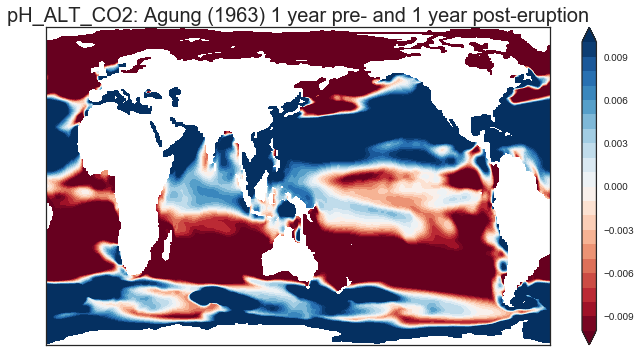

In [14]:
#USE THIS CELL FOR ANIMATION
#to compare pre- versus post-eruption PH data
#print(np.shape(posteruption_ensemblemean),np.shape(preeruption_ensemblemean))
#print(len(testarray))
fig=plt.figure(figsize=(10,5))
levels=np.arange(-.01,.0101,0.001) 
plt.title("pH_ALT_CO2: Agung (1963) 1 year pre- and 1 year post-eruption",fontsize=20)
plt.contourf(posteruption_ensemblemean[ii,:,:]-np.mean(preeruption_ensemblemean[:,:,:],axis=0),levels,cmap=plt.cm.RdBu,extend='both')
plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks
plt.colorbar()
plt.tight_layout()
#plt.savefig('Agung PH_ALT_CO2.png')

In [5]:
# ##COPIED AND PASTED IN CELL BELOW FOR ANIMATION## #

#TO FIX LAT/LONG (1 of 2)

#getting ready for interpolation
#defining old grid
# tlong=ds['TLONG'] #pulls in actual coordinates for each point
# tlat=ds['TLAT'] #pulls in actual coordinates for each point
# #defining new grid
# y=np.arange(-90,90.1,0.25)
# #check min and max values
# #print(tlong.max())
# x=np.arange(0,360.1,0.1)
# xx,yy=np.meshgrid(x,y) #makes two 2D fields of x's and y's

# points=(tlong.values.flatten(),tlat.values.flatten()) #puts points into grid data
# print(np.shape(points))
# values=(posteruption_ensemblemean-preeruption_ensemblemean).flatten() #taking 2D array and making it one list of values
# print(np.shape(values))
# newgrid=(xx.flatten(),yy.flatten())
# print(np.shape(newgrid))

# #interpolation
# newvalues=griddata(points,values,newgrid)
# #print(np.sum(np.isnan(newvalues))) #to check how many nan's there are
# #print(np.size(newvalues)) #to check the size of the array (if the numbers are the same, something has gone wrong)

# reshapedvalues=newvalues.reshape(np.shape(xx)) #put it back into a 2D-array
# #print(len(reshapedvalues))

In [ ]:
# ##COPIED AND PASTED IN CELL BELOW FOR ANIMATION## #

#TO FIX LAT/LONG (2 of 2)

#defines the figure
# fig=plt.figure(figsize=(20,8))

# #defines an axis that has the correct lat/long projection in it
# ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# dataout,longout=add_cyclic_point(reshapedvalues,coord=x)

# plt.contourf(longout,y,dataout,levels,cmap=plt.cm.RdBu,transform=ccrs.PlateCarree())

# #makes coast lines
# ax.coastlines()

# plt.title("pH_ALT_CO2: Agung (1963) 1 year post- and 1 year pre-eruption",fontsize=20)
# plt.xticks([]) #removes x-axis ticks
# plt.yticks([]) #removes y-axis ticks
# plt.colorbar()
# plt.tight_layout()
# plt.savefig('PH_ALT_CO2 Agung 1 year.png')

Traceback (most recent call last):
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1753, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-26-c1616a11c604>", line 9, in init
    line.set_data([], [])
NameError: name 'line' is not defined


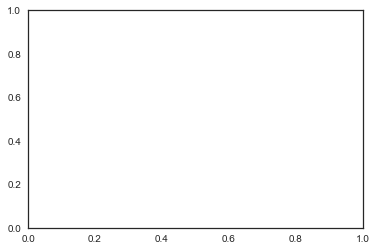

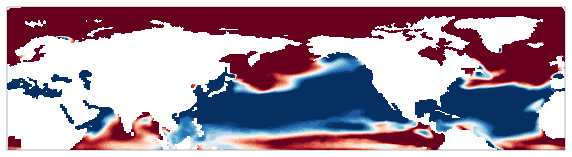

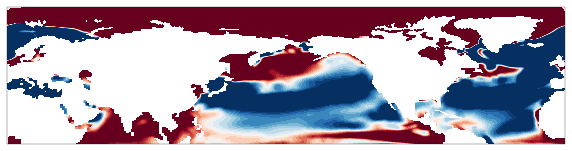

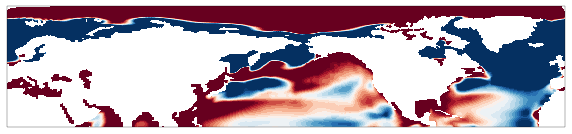

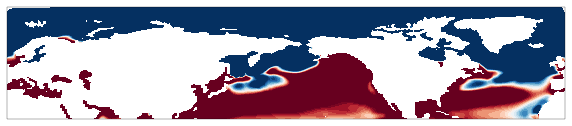

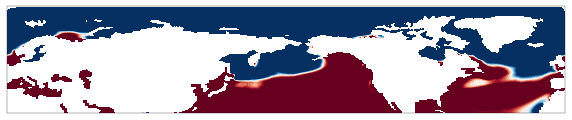

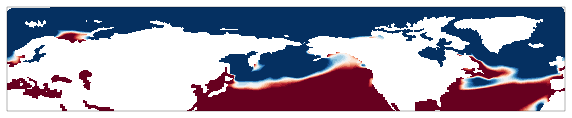

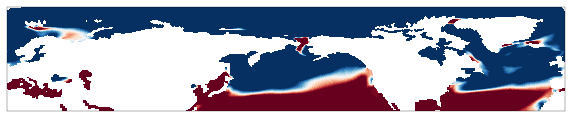

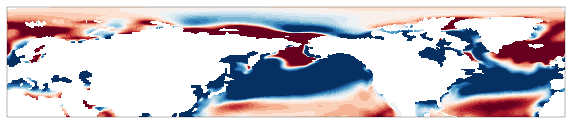

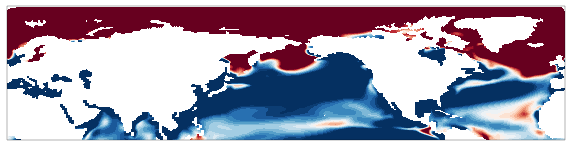

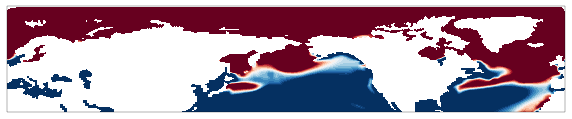

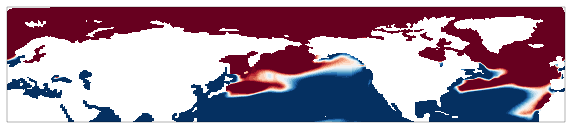

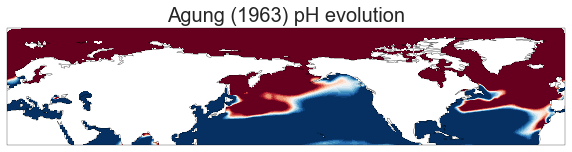

In [26]:
# ##ALMOST THERE! 7/23## #


levels=np.arange(-.01,.0101,0.001)
fig,ax = plt.subplots()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(posteruption_ensemblemean[ii,:,:]-np.mean(preeruption_ensemblemean[:,:,:],axis=0))
    return (line,)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=2000, blit=True)

ims=[]
for ii in range(a): 
#    im=ax.contourf(posteruption_ensemblemean[ii,:,:]-np.mean(preeruption_ensemblemean[:,:,:],axis=0),levels)
#     add_arts=im.collections
#     ims.append(add_arts)
    
    #TO FIX LAT/LONG (1 of 2)

    #getting ready for interpolation
    #defining old grid
    tlong=ds['TLONG'] #pulls in actual coordinates for each point
    tlat=ds['TLAT'] #pulls in actual coordinates for each point
    #defining new grid
    y=np.arange(-90,90.1,0.25)
    #check min and max values
    #print(tlong.max())
    x=np.arange(0,360.1,0.1)
    xx,yy=np.meshgrid(x,y) #makes two 2D fields of x's and y's

    points=(tlong.values.flatten(),tlat.values.flatten()) #puts points into grid data
    #print(np.shape(points))
    values=(posteruption_ensemblemean[ii,:,:]-np.mean(preeruption_ensemblemean[:,:,:],axis=0)).flatten() #taking 2D array and making it one list of values
    #print(np.shape(values))
    newgrid=(xx.flatten(),yy.flatten())
    #print(np.shape(newgrid))

    #interpolation
    newvalues=griddata(points,values,newgrid)
    #print(np.sum(np.isnan(newvalues))) #to check how many nan's there are
    #print(np.size(newvalues)) #to check the size of the array (if the numbers are the same, something has gone wrong)

    reshapedvalues=newvalues.reshape(np.shape(xx)) #put it back into a 2D-array
    #print(len(reshapedvalues))
    
    #TO FIX LAT/LONG (2 of 2)

    #defines the figure
    fig=plt.figure(figsize=(10,5))

    #defines an axis that has the correct lat/long projection in it
    ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

    dataout,longout=add_cyclic_point(reshapedvalues,coord=x)
    
    im=ax.contourf(longout,y,dataout,levels,cmap=plt.cm.RdBu,transform=ccrs.PlateCarree(),extend='both')
    #im=ax.contourf(posteruption_ensemblemean[ii,:,:]-np.mean(preeruption_ensemblemean[:,:,:],axis=0),levels)
    add_arts=im.collections
    ims.append(add_arts)
    
#makes coast lines
ax.coastlines()
plt.title("Agung (1963) pH evolution",fontsize=20)
plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks
#plt.colorbar()

anim = animation.ArtistAnimation(fig, ims)
#HTML(anim.to_html5_video())

anim.save('basic_animation_sunday.mp4', codec='rawvideo', fps=2)#,extra_args=['-vcodec', 'libx264'])

#plt.show()

(12, 384, 320)


Traceback (most recent call last):
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/Users/holivarez/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1753, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-27-e5270335534b>", line 11, in init
    line.set_data([], [])
NameError: name 'line' is not defined


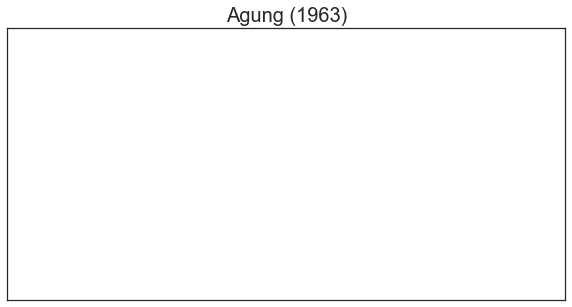

In [27]:
# If you do not run 1 of 2 and 2 of 2 above, this works:

fig,ax = plt.subplots()
levels=np.arange(-.01,.0101,0.001)

print(np.shape(posteruption_ensemblemean-preeruption_ensemblemean))
#line,=ax.contourf(np.zeros(np.shape(preeruption_ensemblemean[0,:,:]))

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(posteruption_ensemblemean[i,:,:]-preeruption_ensemblemean[i,:,:],levels,cmap=plt.cm.RdBu,extend='both')
    return (line,)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=2000, blit=True)
                
####anim = animation.FuncAnimation(fig, animate, init_func=init,
#                               frames=10, interval=1, blit=True)
ims=[]
for ii in range(a): 
    im=ax.contourf(posteruption_ensemblemean[ii,:,:]-preeruption_ensemblemean[ii,:,:],levels,cmap=plt.cm.RdBu,extend='both')
    add_arts=im.collections
    ims.append(add_arts)
anim = animation.ArtistAnimation(fig, ims)
#HTML(anim.to_html5_video())

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#makes coast lines
#ax.coastlines()

plt.title("Agung (1963)",fontsize=20)
plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks
h_in_inches = 10
w_in_inches = 5
fig.set_size_inches(h_in_inches, w_in_inches, True)
#dpi=600
#(dpi * h_in_inches) * (dpi * w_in_inches)
#add dpi=dpi after fps=2

#plt.colorbar()

anim.save('basic_animation.mp4',codec='rawvideo', fps=2)#,extra_args=['-vcodec', 'libx264','-pix_fmt','yuv420p']

#plt.show()